In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
import scipy.stats as ss
import numpy as np
from scipy.stats import pointbiserialr

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/train/data_merged.csv', sep=';')
df

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,...,Good,Poor,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,...,Acceptable,Good,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,...,Good,Acceptable,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,...,Excellent,Good,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

In [4]:
# List of categorical columns to plot
categorical_columns = [
    'Overall_Experience', 'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort',
    'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
    'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
    'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
    'CheckIn_Service', 'Cleanliness', 'Online_Boarding'
]

In [5]:
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [6]:
values_order1 = ['Extremely Poor', 'Poor', 'Needs Improvement', 'Acceptable', 'Good', 'Excellent']
values_order2 = ['Very Inconvenient', 'Inconvenient', 'Needs Improvement', 'Manageable', 'Convenient', 'Very Convenient']

In [7]:
ordinal_columns1 = ['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 
                   'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
                   'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

ordinal_columns2 = ['Platform_Location']

In [8]:
for column in ordinal_columns1:
    df[column] = pd.Categorical(df[column], categories=values_order1, ordered=True)

for column in ordinal_columns2:
    df[column] = pd.Categorical(df[column], categories=values_order2, ordered=True)

In [9]:
numerical_columns = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [10]:
# Initialize the label encoder
label_encoder = LabelEncoder()
encoded_df = df.copy()

# Apply label encoding to all categorical columns
for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

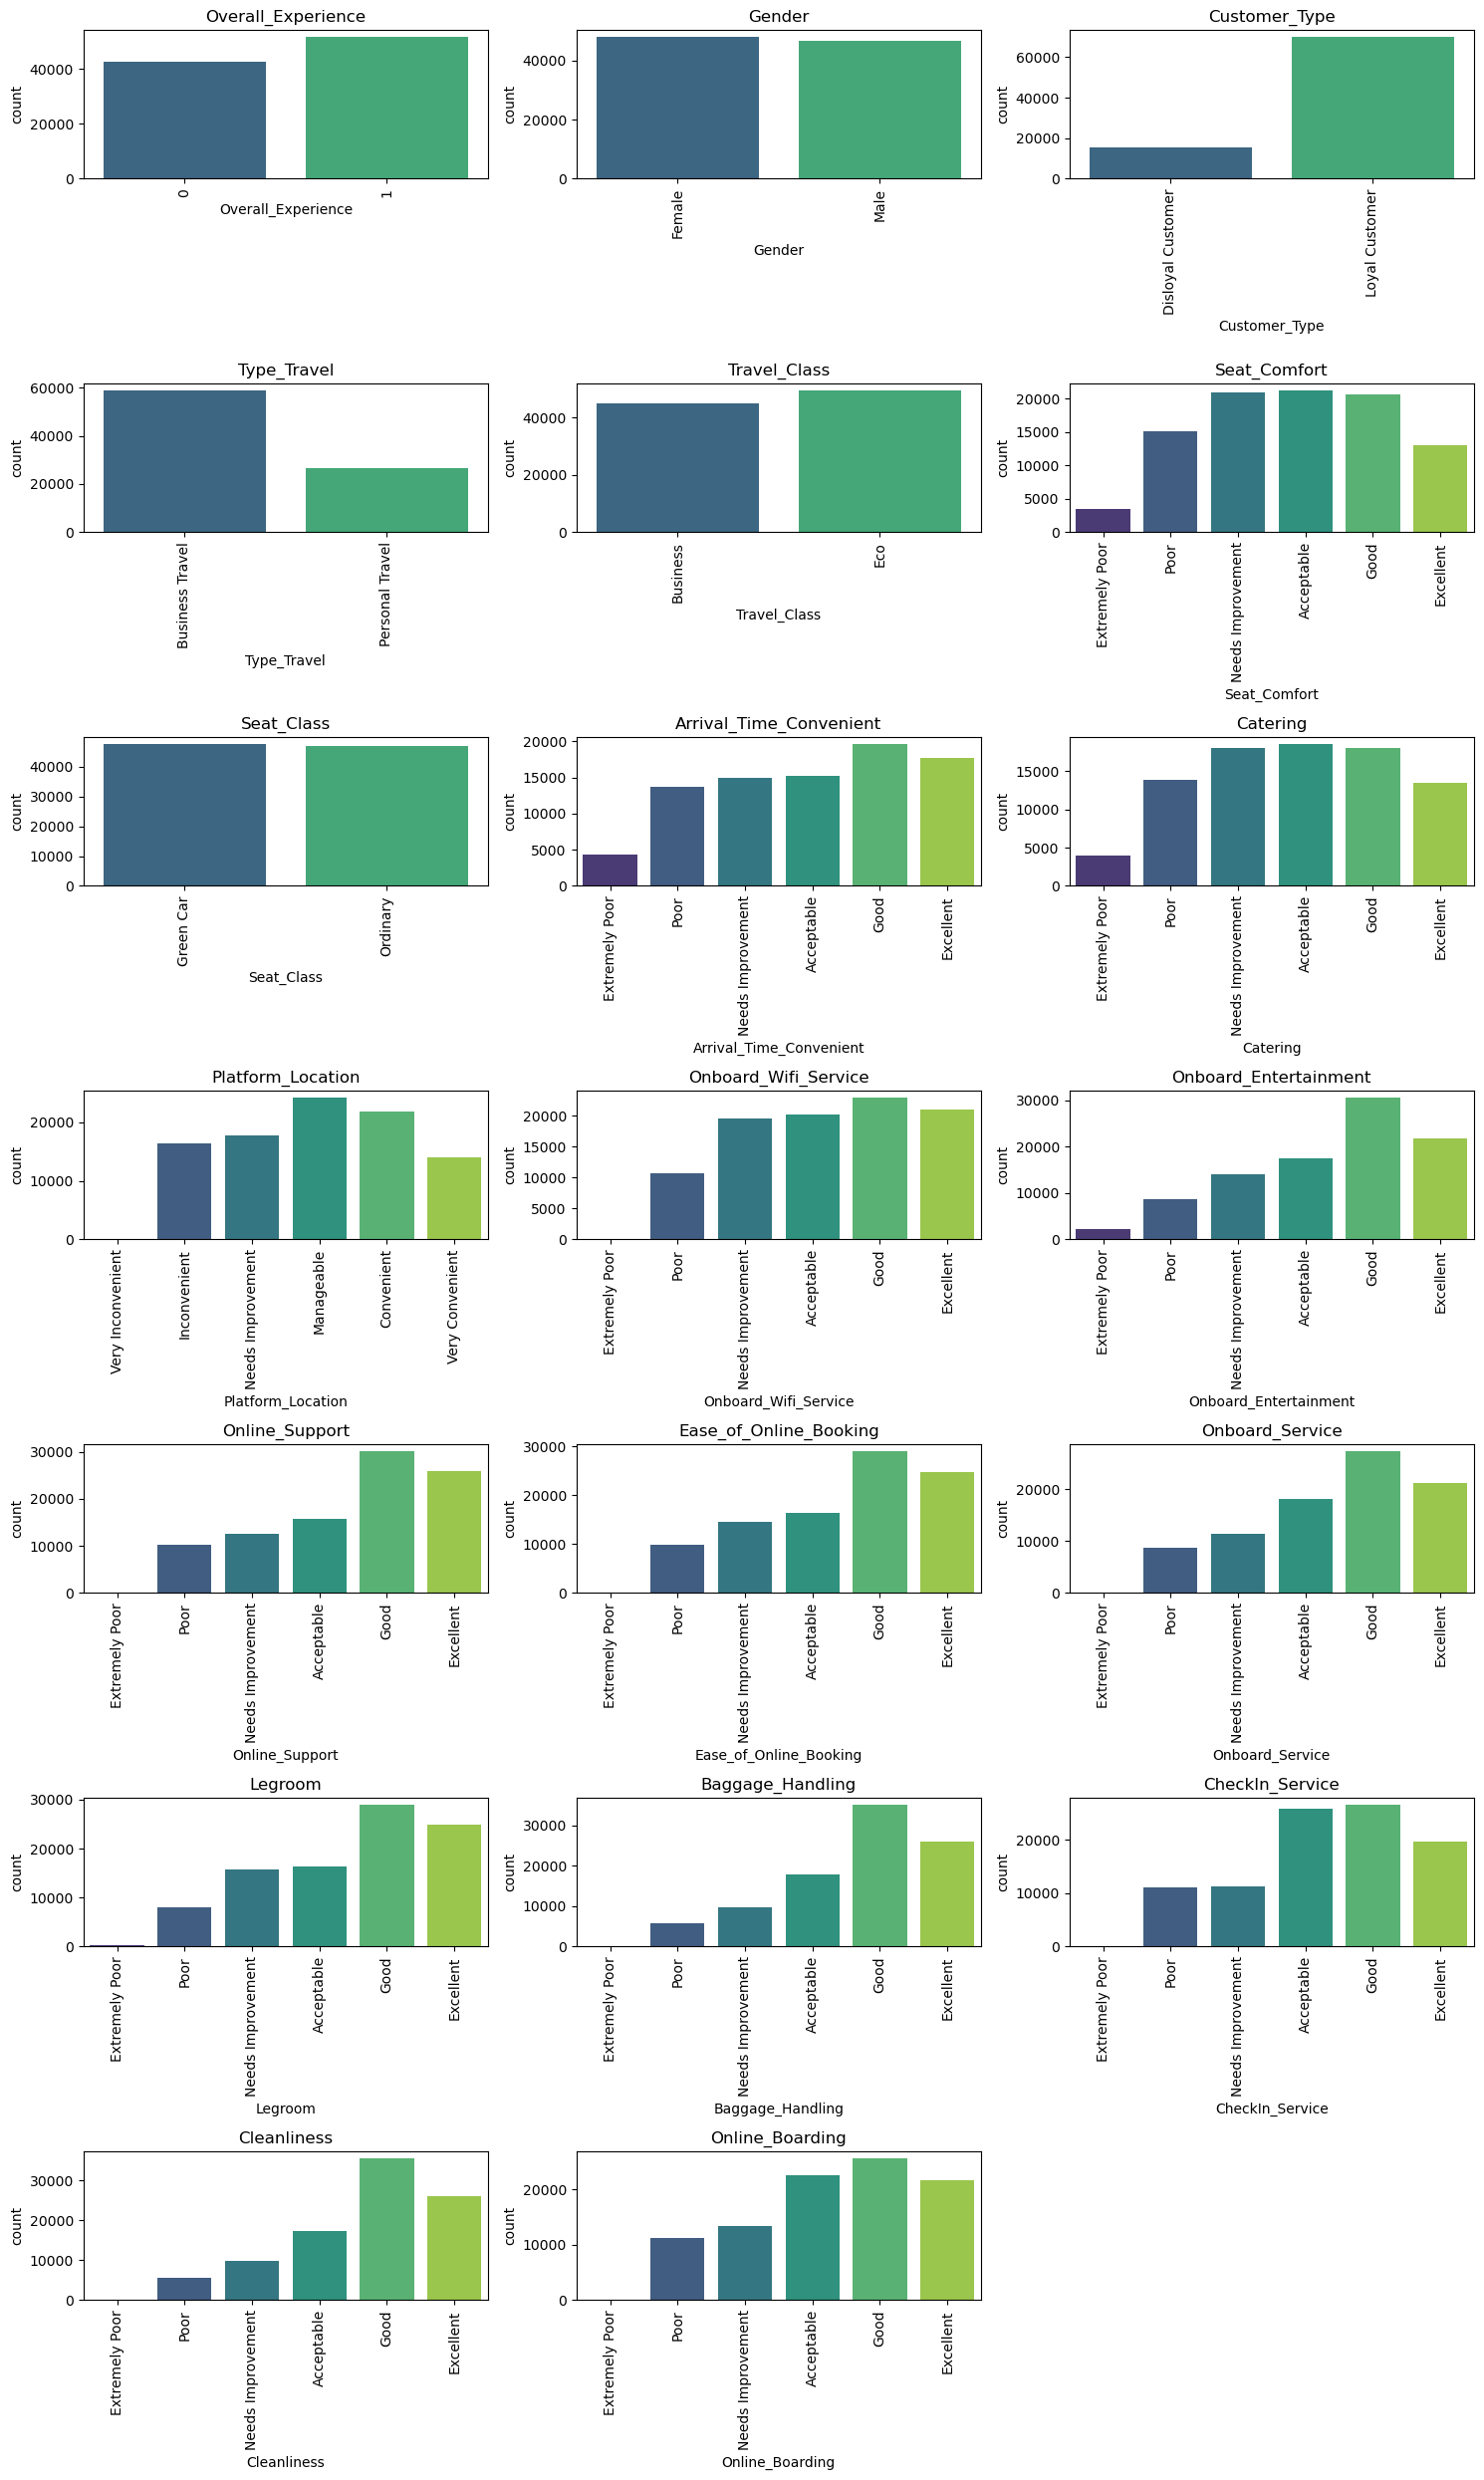

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 25))


# Plot the count distribution of each categorical variable
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(7, 3, i)

    if column in ordinal_columns1:
        sns.countplot(data=df, x=column, palette='viridis', order=values_order1)

    elif column in ordinal_columns2:
        sns.countplot(data=df, x=column, palette='viridis', order=values_order2)
        
    else:
        sns.countplot(data=df, x=column, palette='viridis')
    plt.title(column)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [12]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))    
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [13]:
def point_biserial(x, y):
    return pointbiserialr(x, y)[0]

In [14]:
all_columns = categorical_columns + numerical_columns

corr_matrix = pd.DataFrame(index=all_columns, columns=all_columns)

encoded_df.dropna(inplace=True)

# Calculate Cramér's V for categorical vs. categorical
for col1 in categorical_columns:
    for col2 in categorical_columns:
        corr_matrix.loc[col1, col2] = cramers_v(encoded_df[col1],encoded_df[col2])

# Calculate point-biserial for categorical vs. numerical
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        corr_matrix.loc[cat_col, num_col] = point_biserial(encoded_df[cat_col], encoded_df[num_col])
        corr_matrix.loc[num_col, cat_col] = point_biserial(encoded_df[cat_col], encoded_df[num_col])

# Calculate Pearson for numerical vs. numerical
for col1 in numerical_columns:
    for col2 in numerical_columns:
        corr_matrix.loc[col1, col2] = encoded_df[[col1, col2]].corr().iloc[0, 1]

In [15]:
corr_matrix = corr_matrix.astype(float)

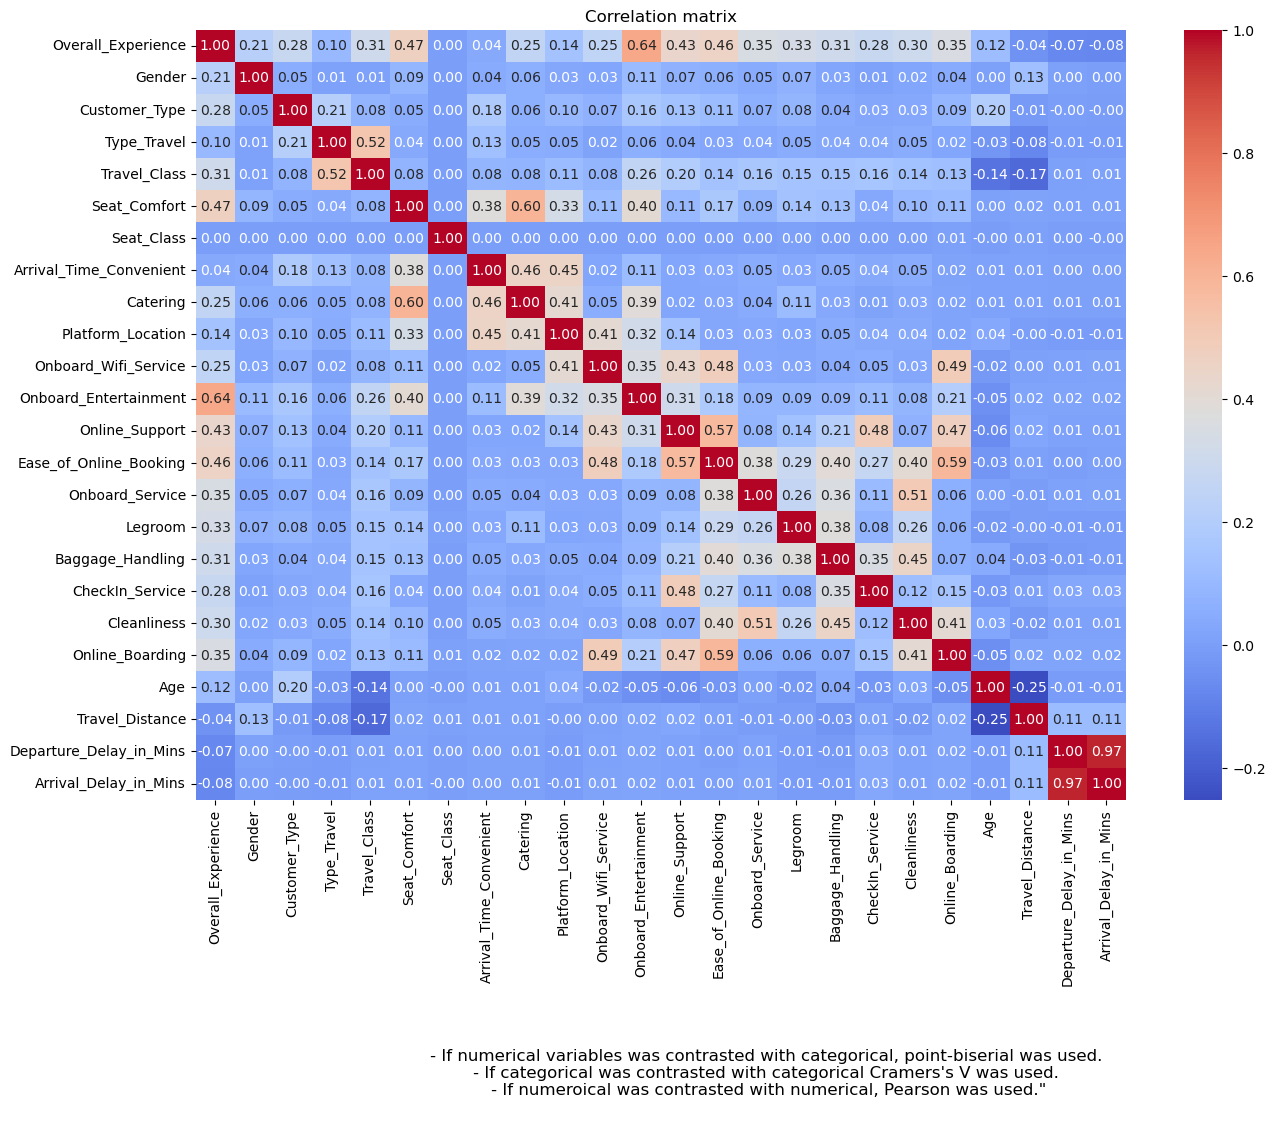

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix")

caption = f'''
    - If numerical variables was contrasted with categorical, point-biserial was used. 
    - If categorical was contrasted with categorical Cramers's V was used. 
    - If numeroical was contrasted with numerical, Pearson was used."
'''

plt.figtext(0.5, -0.2, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()